In [2]:
import numpy as np
from scipy import signal
import adi

In [38]:
sample_rate = 20e6 # Hz
center_freq = 900.1e6 # Hz

sdr = adi.Pluto("ip:192.168.2.1")
sdr.sample_rate = int(sample_rate)
sdr.tx_rf_bandwidth = int(sample_rate) # filter cutoff, just set it to the same as sample rate
sdr.tx_lo = int(center_freq)
sdr.tx_buffer_size = 2**15
sdr.tx_hardwaregain_chan0 = -80 # Increase to increase tx power, valid range is -90 to 0 dB

In [60]:
# N = 10000000 # number of samples to transmit at once
# t = np.arange(N)/sample_rate
# samples = 0.5*np.exp(2.0j*np.pi*100e3*t) # Simulate a sinusoid of 100 kHz, so it should show up at 915.1 MHz at the receiver
filt = signal.firwin(51, cutoff = 0.5, window = "hamming")
samples = np.random.normal(0,1,int(2**15/2)) + 1j*np.random.normal(0,1,int(2**15/2))
samples = np.convolve(samples,filt)
samples /= max(samples)

samples *= 2**14 # The

# Transmit our batch of samples 100 times, so it should be 1 second worth of samples total, if USB can keep up
sdr.tx_cyclic_buffer = True  
sdr.tx(samples) # transmit the batch of samples once

In [63]:
sdr.tx_hardwaregain_chan0 = -20

In [64]:
sdr.tx_destroy_buffer()

In [51]:
sdr

Pluto(uri="ip:192.168.2.1") object "PlutoSDR" with following key properties:

rx_lo:                   2399.999998  MHz, Carrier frequency of RX path
rx_hardwaregain_chan0    58           dB, Gain applied to RX path. Only applicable when gain_control_mode is set to 'manual'
rx_rf_bandwidth:         18.0         MHz, Bandwidth of front-end analog filter of RX path
gain_control_mode_chan0: slow_attack  Receive path AGC Options: slow_attack, fast_attack, manual

tx_lo:                   900.099998   MHz, Carrier frequency of TX path
tx_hardwaregain_chan0:   -80          dB, Attenuation applied to TX path
tx_rf_bandwidth:         20.0         MHz, Bandwidth of front-end analog filter of TX path
tx_cyclic_buffer:        1            Toggles cyclic buffer

filter:                  [128.0, 4.0, 128.0, 4.0] FIR filter file
sample_rate:             20.0         MSPS, Sample rate RX and TX paths
loopback:                0            0=Disabled, 1=Digital, 2=RF


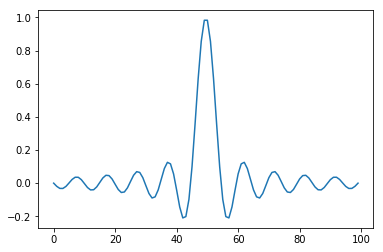

In [33]:
import matplotlib.pyplot as plt

x  = np.linspace(-10,10,100)
y1 = np.sinc(x)
y = np.convolve(filt, y1)
plt.plot(y1)

<function matplotlib.pyplot.show(*args, **kw)>

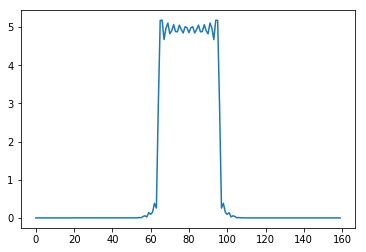

In [34]:
plt.plot(np.fft.fftshift(np.abs(np.fft.fft(y))))
plt.show

In [31]:
filt = signal.firwin(61, cutoff = 0.3, window = "hamming")

Text(0.5, 1.0, 'Frequency response')

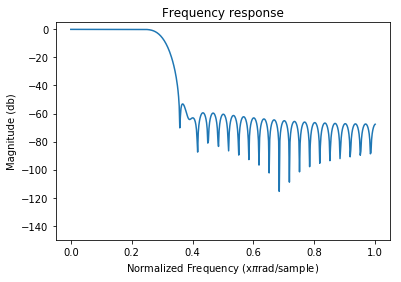

In [32]:
w,h = signal.freqz(filt,1)
h_dB = 20 * np.log10 (abs(h))
plt.plot(w/max(w),h_dB)
plt.ylim(-150, 5)
plt.ylabel('Magnitude (db)')
plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
plt.title(r'Frequency response')